Netflix Titles 2021 Analysis 
This notebook explores the Netflix Titles 2021 dataset, analyzing the content, genres, and release patterns

Objectives 
-Trend Analysis of Netflix content over time
-Genre popularity and evaluation
-Reginal content expresion 
-Content ratings and audience preference
-Content duration analysis

Data Information
-The dataset contains details of movies and TV shows avialiable on Netflix as of 2021
-It includes features such as title, genre, release year, country, and rating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load the dataset
nf = pd.read_csv("/kaggle/input/neflix2021-titles/netflix_titles_2021.csv")
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#Data wrangling
nf.info()
nf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
#Trend Analysis of Netflix content overtime

#How Netflix library has evolved over the years
nf['release_year'].value_counts().sort_index()



release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

Text(0.5, 1.0, 'Number of content based on the production years')

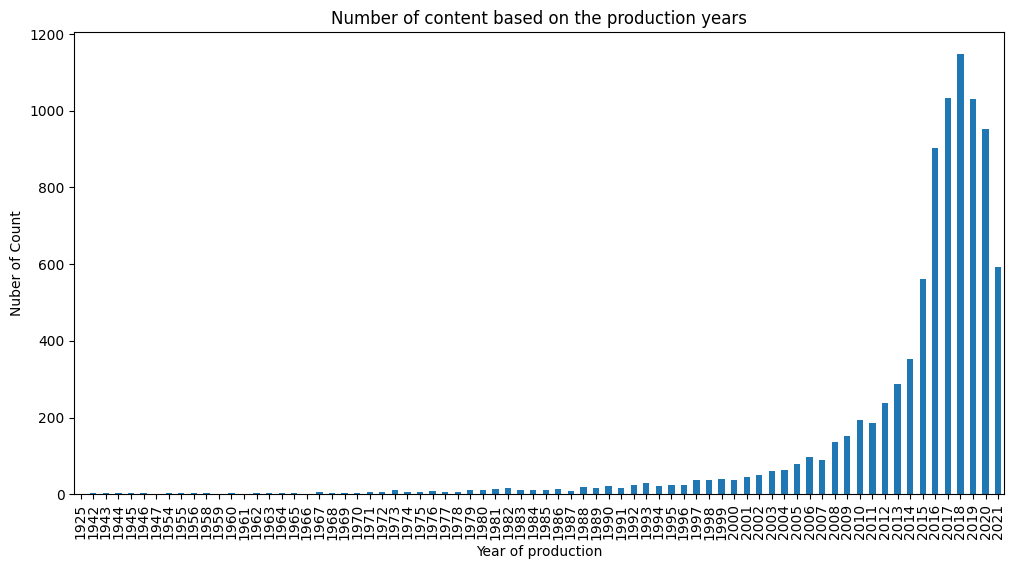

In [4]:
#visualizing the production years of the contents available on Netflix
#Note that these are the years in which those content goes back to (Netflix existed on Aug 29, 1997)
nf['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.xlabel('Year of production')
plt.ylabel('Nuber of Count')
plt.title('Number of content based on the production years')


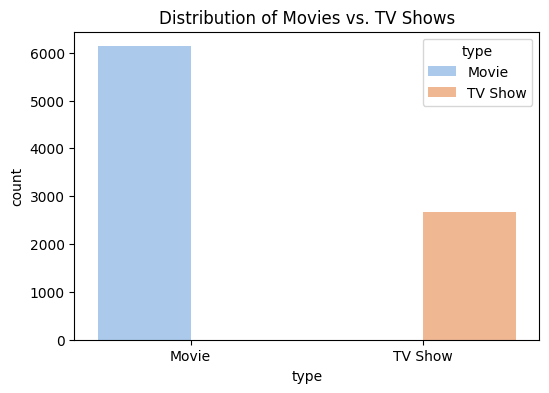

In [5]:
#Number of Movies vs. TV Shows

import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=nf, x='type', hue='type', palette='pastel')
plt.title('Distribution of Movies vs. TV Shows')
plt.show()


In [6]:
#Genre popularity and evaluation
#Discover which genres are popular and how their distribution over time


In [7]:
#Most common genres in Netflix library
#Since the genres are on the column called "listed_in" and the column needs further adjustments so we can preform analysis on it
#We will use "TfidfVectorizer" text extractor to extract genres out of the column and analyze them

from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
tfidf = TfidfVectorizer() #will be used to conver the text (genres) data into numerical data

tfidf_matrix = tfidf.fit_transform(nf['listed_in'])

In [9]:
#Because latter we will need to plot the genres.
#The tfidf_matix can not be plotted using "plot()" attribute.
#Thus, we need to conver the tfidf_matrix into a dense format

tfidf_dense = tfidf_matrix.toarray()

genres_scores = tfidf_dense.sum(axis=0) #array with the scores of the tfidf_dense (the genres scores)

#A dataframe is always simpler in plotting and visualizing

genre_df = pd.DataFrame(genres_scores,
                        columns=['Score'],
                        index=tfidf.get_feature_names_out())
genre_df = genre_df.sort_values(by="Score", ascending=False)
genre_df

#At this point we have all the needed genres ready to be analyzed.

,Score
movies,1864.017936
tv,1485.977065
dramas,1335.679494
international,1302.526136
comedies,1076.057155
shows,797.738778
documentaries,670.828800
adventure,517.027684
action,517.027684
romantic,493.372138


In [10]:
#even though we have all genres ready to be analyzed. 
#Some genres in the dataset are to recognized to be a real genres (e.g., TV, up...)
#thus, we will define a list called "genre_keywords" that contains all-cinema recognized-genres

genre_keywords = [
    "action", "adventure", "comedies", "comedy", "crime", "dramas", "fantasy",
    "horror", "mystery", "romantic", "sci", "fi", "thrillers", "anime", "documentaries",
    "docuseries", "family", "kids", "lgbtq", "musicals", "music", "classic", 
    "independent", "spanish", "korean", "cult", "sports", "teen", "talk"
]
genre_keywords

['action',
 'adventure',
 'comedies',
 'comedy',
 'crime',
 'dramas',
 'fantasy',
 'horror',
 'mystery',
 'romantic',
 'sci',
 'fi',
 'thrillers',
 'anime',
 'documentaries',
 'docuseries',
 'family',
 'kids',
 'lgbtq',
 'musicals',
 'music',
 'classic',
 'independent',
 'spanish',
 'korean',
 'cult',
 'sports',
 'teen',
 'talk']

In [11]:
#Now we will filter only the wanted genres out from the dataset

genre_filtered = genre_df.loc[
    genre_df.index.str.contains('|'.join(genre_keywords), case=False, na=False)
]
genre_filtered

,Score
dramas,1335.679494
comedies,1076.057155
documentaries,670.828800
adventure,517.027684
action,517.027684
romantic,493.372138
independent,477.557593
thrillers,448.368377
family,377.208486
kids,312.924715


<Figure size 1200x600 with 0 Axes>

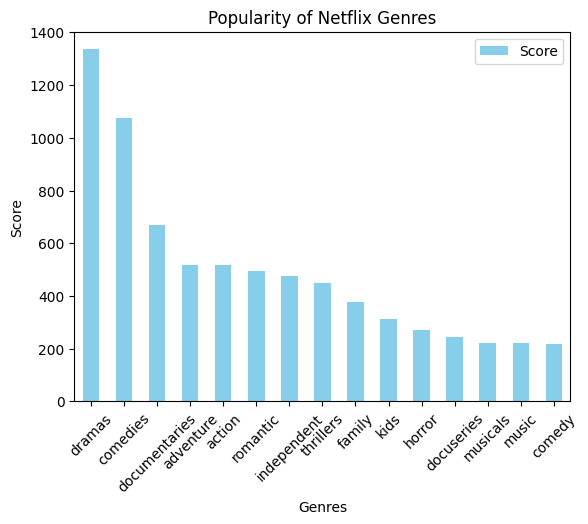

In [12]:
#Visualizing genre popularity

plt.figure(figsize=(12, 6))
genre_filtered.head(15).sort_values(by="Score", ascending=False).plot(kind='bar',
                                                 color='skyblue')
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.title("Popularity of Netflix Genres")
plt.show()

In [13]:
#Genres shift over time: how does the genre popularity varies with time?

#Since genres are grouped within the "listed_in" column we need to seperate them. 
#This operation to some point is very close to the one done above in using TfidfVectorizer.
nf['listed_in'] = nf['listed_in'].str.split(', ')
nf_exploded = nf.explode('listed_in') #this will keep each genre in the column gets its own separate row 
nf_exploded['listed_in'] 


0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

In [14]:
#Now we will group the dataset by the wanted column (listed_in and release_year)

genres_over_years = nf_exploded.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)
genres_over_years

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
1925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,89.0,6.0,10.0,34.0,55.0,1.0,0.0,164.0,54.0,1.0,...,8.0,57.0,77.0,4.0,9.0,4.0,2.0,3.0,5.0,68.0
2018,81.0,8.0,24.0,37.0,69.0,2.0,1.0,178.0,79.0,1.0,...,28.0,82.0,109.0,11.0,15.0,7.0,0.0,7.0,8.0,83.0
2019,44.0,6.0,18.0,26.0,82.0,3.0,0.0,159.0,92.0,0.0,...,35.0,75.0,133.0,16.0,16.0,14.0,2.0,16.0,14.0,71.0


In [15]:
#As you see in "genres_over_years" some genres might be consider form the same category (e.g., Action & adventure comes back to be considered as action in genrea
#Thus, will will creat a mapping for that

genre_mapping = {
             'Action': 'Action & Adventure',
             'Adventure': 'Action & Adventure',
             'Animation': 'Anime Features', 
             'Comedy': 'Comedies',
             'Drama': 'Dramas',
             'Horror': 'Horror Movies',
             'Mystery': 'TV Mysteries',  
             'Romance': 'Romantic Movies',
             'Sci-Fi': 'Sci-Fi & Fantasy',
             'Thriller': 'Thrillers'}
#And out of all these genres we are only focused on the popular genres 
#thus we will define "popular_genres"

popular_genres = ['Action', 'Drama', 'Comedy', 'Thriller',
                   'Adventure', 'Horror', 'Romance', 'Sci-Fi',
                   'Mystery', 'Animation']

#A list with wanted genres mapped-out form the popular_genres
mapped_genres = [
    genre_mapping[g] for g 
    in popular_genres 
    if g 
    in genre_mapping[g]
    in genres_over_years.columns]
mapped_genres



['Action & Adventure',
 'Dramas',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Sci-Fi & Fantasy']

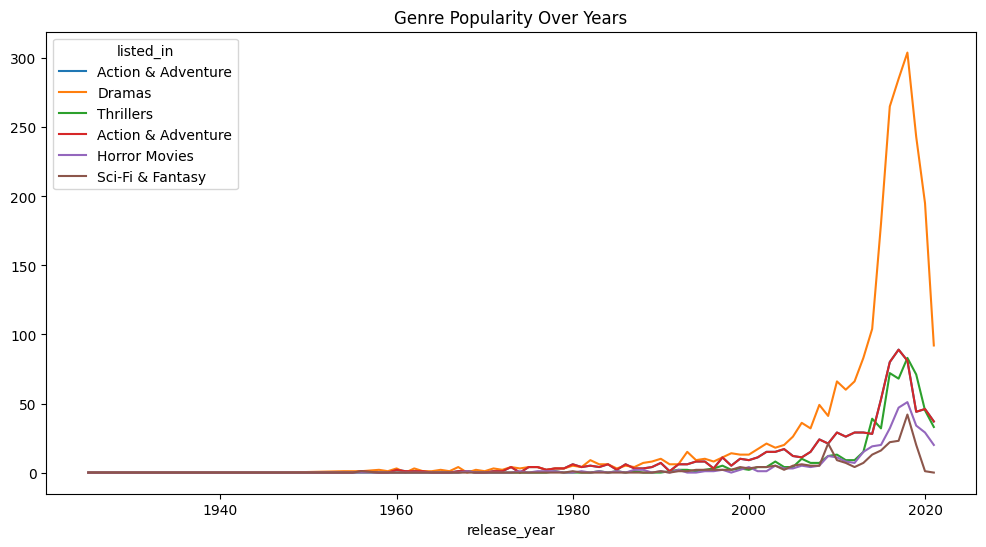

In [16]:
#Now we will visualize to see how the wanted genres changed over the years

if mapped_genres:
    genres_over_years[mapped_genres].plot(
        figsize=(12,6),
        title='Genre Popularity Over Years')
else:
    print('No Matching Genres Found in Genre_trends')

plt.show()

In [17]:
#Regional content expantion.
#Analyzing Netflix growth in different countries 

from collections import Counter



In [18]:
#lets stip the number of occureness of each country
#the number of occurenss is telling us how many movies made about/on that country

country_counts = Counter([country.strip() for
                          countries in nf['country'].dropna()
                          for country in countries.split(',')])
country_counts 

Counter({'United States': 3690,
         'South Africa': 62,
         'India': 1046,
         'Ghana': 5,
         'Burkina Faso': 1,
         'United Kingdom': 806,
         'Germany': 226,
         'Ethiopia': 1,
         'Czech Republic': 22,
         'Mexico': 169,
         'Turkey': 113,
         'Australia': 160,
         'France': 393,
         'Finland': 11,
         'China': 162,
         'Canada': 445,
         'Japan': 318,
         'Nigeria': 103,
         'Spain': 232,
         'Belgium': 90,
         'South Korea': 231,
         'Singapore': 41,
         'Italy': 100,
         'Romania': 14,
         'Argentina': 91,
         'Venezuela': 4,
         'Hong Kong': 105,
         'Russia': 27,
         '': 7,
         'Ireland': 46,
         'Nepal': 2,
         'New Zealand': 33,
         'Brazil': 97,
         'Greece': 11,
         'Jordan': 9,
         'Colombia': 52,
         'Switzerland': 19,
         'Israel': 30,
         'Taiwan': 89,
         'Bulgaria': 10,
     

In [19]:
#Now we will split the country values and occurness by creating a data frame

country_df = pd.DataFrame(country_counts.items(),
                          columns=['Country', 'Count']).sort_values(by='Count', ascending=False)
country_df



,Country,Count
0,United States,3690
2,India,1046
5,United Kingdom,806
15,Canada,445
12,France,393
...,...,...
98,Ecuador,1
99,Armenia,1
100,Mongolia,1
101,Bahamas,1


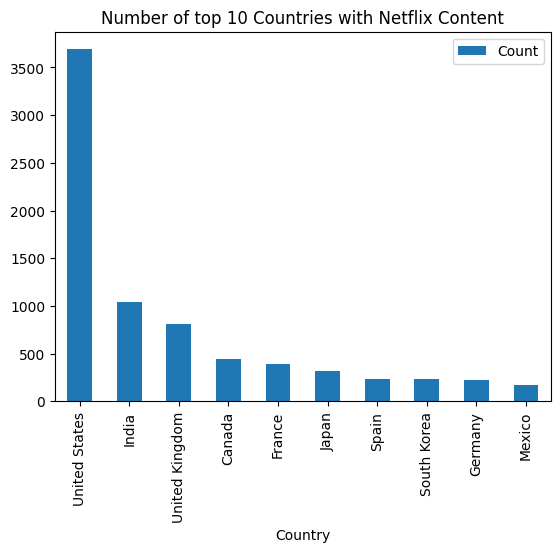

In [20]:
#Visualizing the number of content per country

country_df.head(10).plot(x='Country', y='Count', kind='bar')
plt.title('Number of top 10 Countries with Netflix Content')
plt.show()


In [21]:
#Content Ratings and Audience Preference  


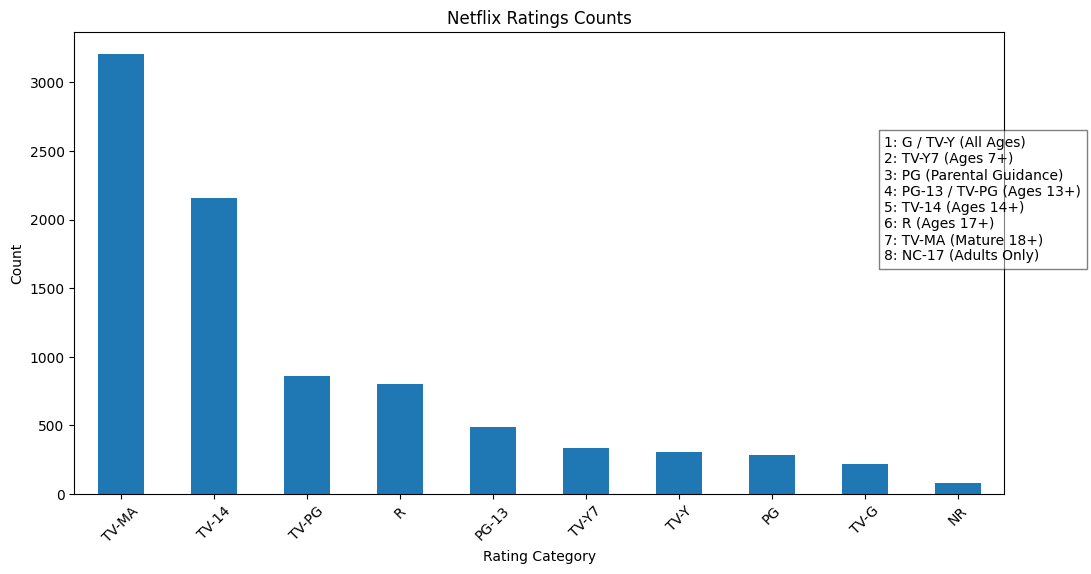

In [22]:
#We will explore the most common content ratings in the Netflix dataset
#The rating column on the dataset is built up-on acronym (e.g., TV-MA for Mature Audiences, TV-Y for Young Children)
#Thus, we will create a legend for that. And to be latter add to the plot

#legend added for better interpretation for readers 
rating_legend_text = "\n".join([
    "1: G / TV-Y (All Ages)",
    "2: TV-Y7 (Ages 7+)",
    "3: PG (Parental Guidance)",
    "4: PG-13 / TV-PG (Ages 13+)",
    "5: TV-14 (Ages 14+)",
    "6: R (Ages 17+)",
    "7: TV-MA (Mature 18+)",
    "8: NC-17 (Adults Only)"
])

#Ploting the ratings
ax = nf['rating'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Netflix Ratings Counts')

plt.gcf().text(0.8,0.5, 
               rating_legend_text,
               fontsize=10,
               bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [23]:
#How does the number of seasons of TV shows vary?

#We first need to filter and get the TV shows by themselfs 
TV_show = nf[nf['type'] == 'TV Show']
TV_show #has only the TV shows content rows (No movies)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"[Anime Series, Kids' TV]",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, TV...","Strong-willed, middle-class Kashaf and carefre..."


Text(0.5, 1.0, 'illustration of how Seasons lengths vary')

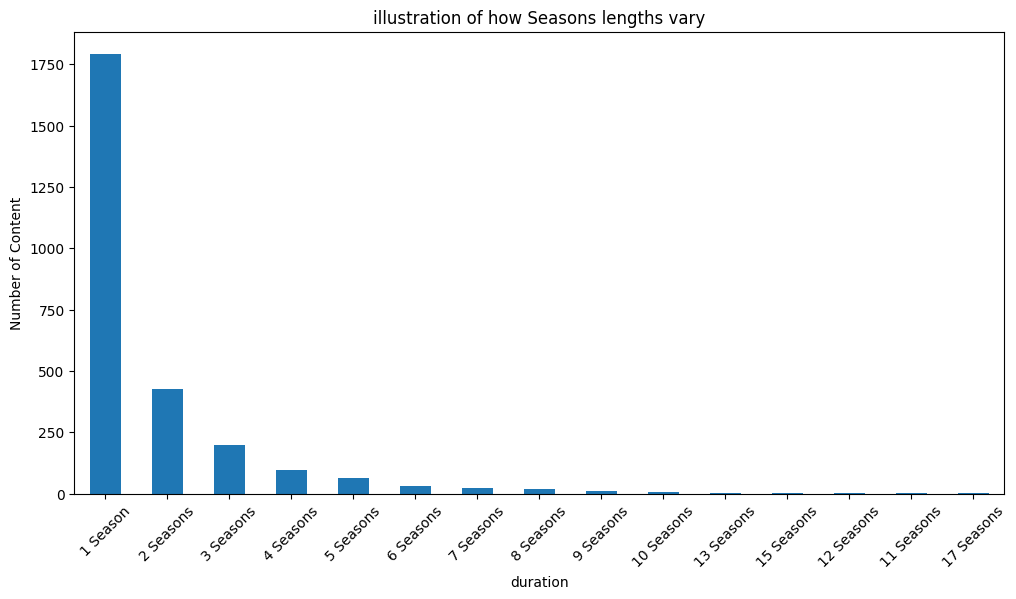

In [24]:
#We are concenrd about the lengths of TV shows seasons
#Thus, we will explore the "duration" column
TV_show['duration'].value_counts().plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.ylabel('Number of Content')
plt.title('illustration of how Seasons lengths vary')


In [25]:
#Now we will explore the movie-type content and figur out different lengths durations (mean of movies duration)

#First we will get all the movies in the dataset
movies = nf[nf['type'] == 'Movie']
movies = movies.copy()
movies




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [26]:
#Agin we will look into the duration column to see the different durations we will deal with
movies['duration'].head(10)



0      90 min
6      91 min
7     125 min
9     104 min
12    127 min
13     91 min
16     67 min
18     94 min
22    161 min
23     61 min
Name: duration, dtype: object

In [27]:
#Mean duration for movies
#In order to calculate the mean we will need to deal with the string values (the word min) in the duration column

#extracting the non-numerics (the min word in the rows)
movies['duration'] = movies['duration'].astype(str).str.extract(r'(\d+)').astype(float)
movies['duration'] #Mean is ready to be calculated



0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

In [28]:
mean_of_movies = movies['duration'].mean()
mean_of_movies

99.57718668407311

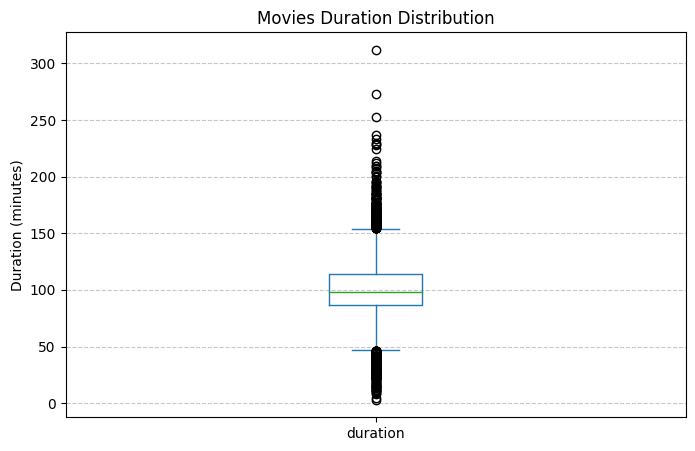

In [29]:
#Ploting the movies duration with the mean 

plt.figure(figsize=(8, 5))
movies['duration'].plot.box(showfliers=True, vert=True)
plt.title('Movies Duration Distribution')
plt.ylabel('Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()